# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----
Salary is always the vital indicator for job seeker to start the career. It's also important for employer. It is one of the difficult tasks for employer/HR to offer ideal salary to ideal candidate not only saves the budget for the company but also not overlook the talents of the candidates.
### ----Project Goal -----
The main goals of the project is that help the Companies to hire the right candidates with the right salary based on various factors (degree, experiences etc.)

In [2]:
#import analysis libraries
import pandas as pd
import sklearn as sk
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

#Sklearn package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder


__author__ = "Mosiur Rahman"
__email__ = "mpspmp2003@gmail.com"

## Part 2 - DISCOVER

### 2.1 Load the data 

In [3]:
#load the data into a Pandas dataframe
train_feature_df = pd.read_csv("data/train_features.csv")
train_salaries_df = pd.read_csv("data/train_salaries.csv")
test_feature_df = pd.read_csv("data/test_features.csv")

### 2.2 Examine the Data

In [4]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## 2.3 Merge train_features_df and train_salaries_df into one dataframe

In [7]:
train_df= pd.merge(train_feature_df,train_salaries_df, on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## 2.4 Checking shape and info of Merge data frame

In [8]:
# checking shape 
train_df.shape

(1000000, 9)

In [9]:
##check dataframe to see length and dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


## 3 Clean the data 

In [10]:
# checking for duplicate values in dataframe
train_df.duplicated().sum()

0

There is no duplicate values,so its fine. we have no need to do anything here.

In [11]:
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

## 3.1 Define numerical and categorical variables

In [12]:
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [13]:
numerical_cols = ['yearsExperience', 'milesFromMetropolis', 'salary']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

## 4 Explore the data (EDA) 

In [14]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### 4.1 Summarizing numerical and categorical columns 

In [15]:
# summary of numerical variable
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [16]:
# summary of the categorical feature
train_df.describe(include='O')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684570284,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### 4.2 Visualizing Target Variable(Salary)

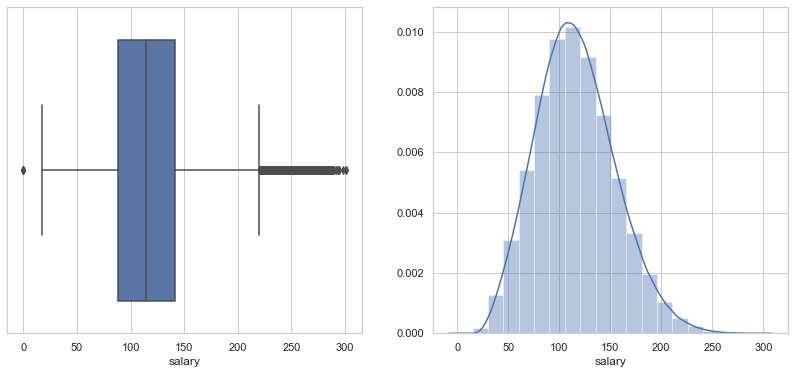

In [17]:
sns.set(style ="whitegrid")
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

#We can see that there are some potentia outliers(e.g. salaray equal zero and more than 300.
#Distribution of Salary is normal distribution which will need to confirm Skewness

### 4.3 Checking Skewness of Target variable

In [18]:
train_df['salary'].skew()

0.346415074651208

Skewness score is less than 0.5, So we can conclude that the distribution is normal for predectied variable

### 4.4 Identify outliers using IQR rule in Predicted variable

In [19]:
st=train_df.salary.describe()
print(st)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [20]:
st=train_df.salary.describe()
print(st)
IQR = st['75%'] - st['25%']
outlier_upper_bound = st['75%'] + 1.5 * IQR
outlier_lower_bound = st['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspicious outliers are {} and {}, respectively.'.format(outlier_upper_bound, outlier_lower_bound))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspicious outliers are 220.5 and 8.5, respectively.


In [21]:
# checking outliers who get slary below 8.5 and remove data with zero salaries.
train_df[train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


It can be seen that these are missing data because when we look years of experience columns, all having years of experience but salary is zero. So we should drop this missing value from the traning data

In [22]:
# check potential outliers who get  salary more than  220.5
train_df.loc[train_df.salary>220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

All these are senior position from CEO down to SENIOR. It is understandable that they earn higher salary. But JUNIOR roles also earn higher salary.That's why we need to further investigation to make sure if it is genuine and perfect data.

In [23]:
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


We can include these in our analysis as it is expected to have master/Doctoral and most of the roles have 20 years years of experience to have higher pay. It also indicate that only OIL and FINANCE industry offer highere salary.So we determine not to remove these outliers from the traning data set.

In [24]:
#removing salary < 0
train_df.drop(train_df[train_df['salary'] <=0].index, inplace=True)

In [25]:
train_df.shape

(999995, 9)

In [26]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [27]:
#define a function to plot both the numeric and categorical features in the dataset 
def feature_plot(df, col):
    #state the plot size 
    plt.figure(figsize = (12, 6))
       
    if df[col].dtype == 'int64':
        mean = df.groupby(col)['salary'].mean()
        mean.plot()
        
    else:
        #if column is not numeric then plot the following:

        sns.boxplot(x = col, y = 'salary', data=df)
        
    #set the labels on the axis    
    plt.xticks(rotation = 45)
    plt.ylabel('salary')
    plt.show()

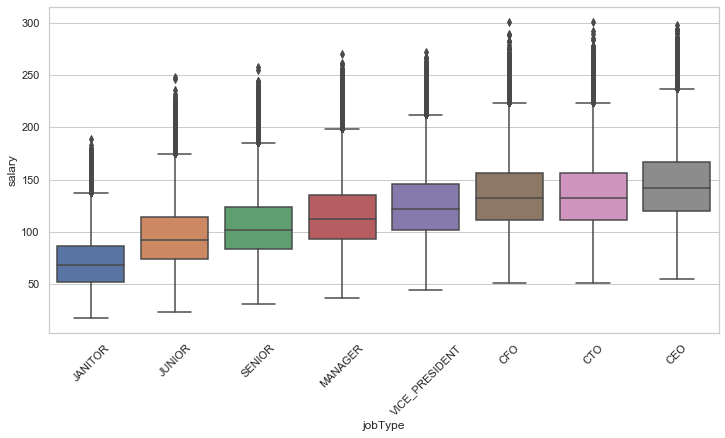

In [28]:
feature_plot(train_df.sort_values('salary',ascending = True), 'jobType')

### 4.5 Checking Relationship between Dependent and Independent variable with Visualization

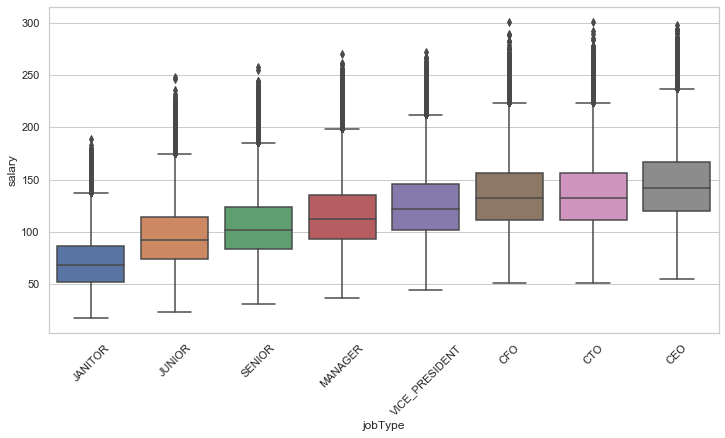

In [29]:
feature_plot(train_df.sort_values('salary',ascending = True), 'jobType')

It can be seen that as the JobType goes on higher postion and salary also increase based on job type. CEO seems to have Higher pay and JANITOR has lower pay.

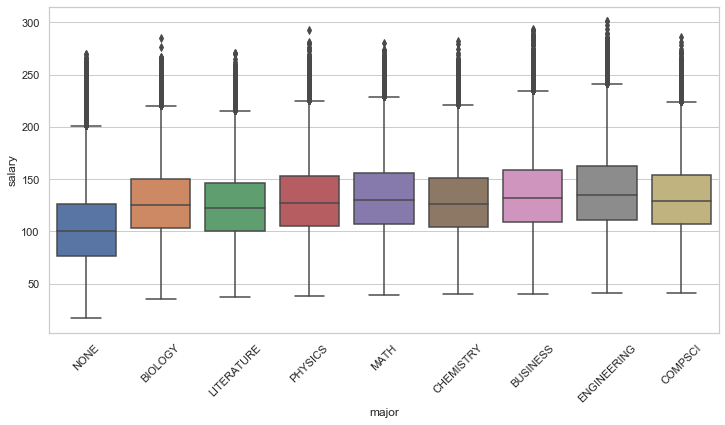

In [30]:
feature_plot(train_df.sort_values('salary',ascending = True), 'major')

Allmost all majors seems to have same salaray range, But those have no major get less salary

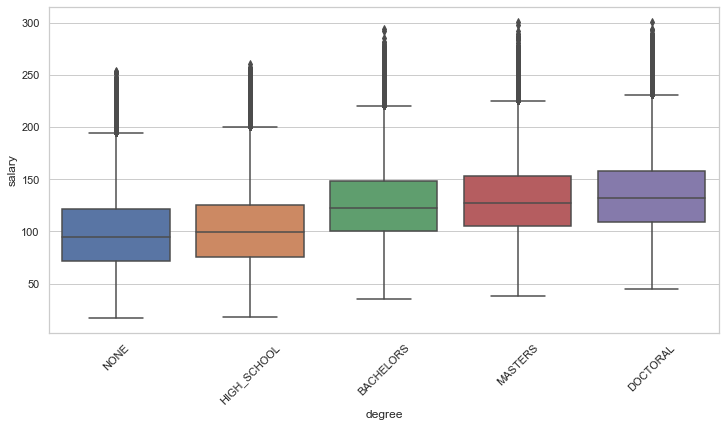

In [31]:
feature_plot(train_df.sort_values('salary',ascending = True), 'degree')

Those have higher degree (e.g. Masters/Doctoral) get higer pay.But those have no degree or high_school diploma get relatively lower pay. 

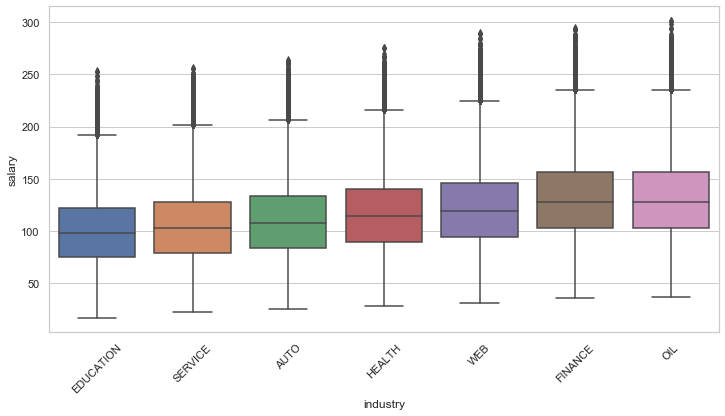

In [32]:
feature_plot(train_df.sort_values('salary',ascending = True), 'industry')

Finance and oil industry have higher salary,education industry seems to have less salary range

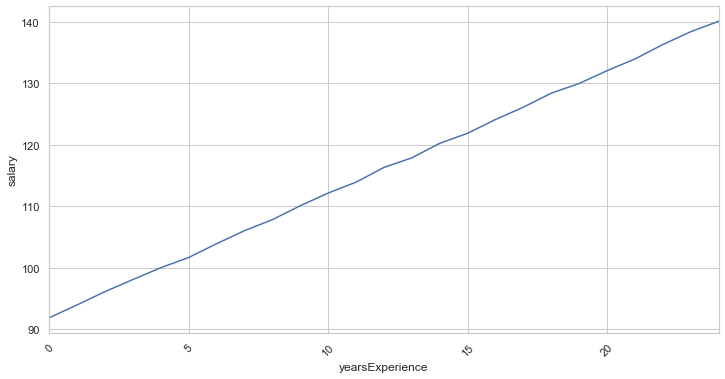

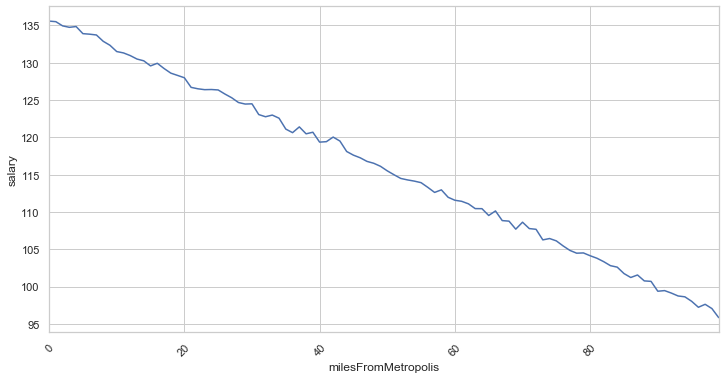

In [33]:
feature_plot(train_df.sort_values('salary',ascending = True), 'yearsExperience')
feature_plot(train_df.sort_values('salary',ascending = True), 'milesFromMetropolis')



Years of Experience and Salary - Positive correlation - There is increase in salary with experience.


Miles from metropolis and Salary - Negative correlation - if miles increase ,salary decreases

Now, we will check for correlation between all varibales. For this purpose, we will convert all the categorical variables to numeric by replacing all varibales with the mean salary of subcategory of that column.

### Create a correlation matrix

In [34]:
#create a duplicate of training dataset to help find correlations between features
corr_df = train_df.copy()

In [35]:
# define a function to encode the categorical variables 
def Encode_Data(dataframe):   
    for col in dataframe.columns:        
        if dataframe[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            dataframe[col]=le.fit_transform(dataframe[col])
    return dataframe

def Display_Correlation(EncodedData):
    plt.figure(figsize=(12,10))
    corr = EncodedData.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns,cmap="PRGn",annot=True,vmin=-1, vmax=1,linewidths=2.5,linecolor='black')
    plt.show() 

In [36]:
#check that the data is encoded correctly 
EncodedData = Encode_Data(corr_df)
#drop jobId because it is unique for each row
EncodedData=EncodedData.drop(['jobId'],axis=1)
EncodedData


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,31,1,3,6,3,10,83,113
1,11,0,2,7,6,3,73,84
2,48,7,1,8,3,10,38,120
3,32,5,1,2,0,8,17,125
4,60,7,0,8,2,8,16,146
...,...,...,...,...,...,...,...,...
999995,52,7,0,2,3,19,94,71
999996,17,2,2,7,2,12,35,143
999997,16,4,2,7,1,16,81,47
999998,23,1,3,7,3,6,5,132


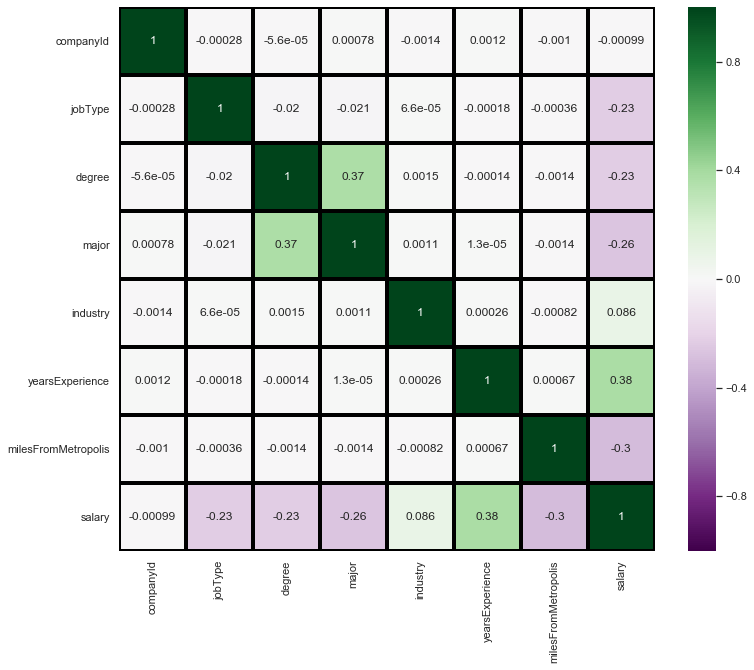

In [37]:
Display_Correlation(EncodedData)

### Observation

- YearsExperience and salar has strong positive correlation
- Degree and major also have strong correlation

### ---- 5 Establish a baseline ----

In [38]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

 First, we create a simple baseline model and then try to compare our other model predictions with it to show how much they improve our baseline.

For baseline - Most of the HR managers use industry mean to calculate the salary, so we will calculate the average salary per industry and then calculate mean squared error.

In [39]:
avg_salary = pd.DataFrame(train_df['salary'].groupby(train_df.industry).mean())
predicted_salary  = train_df.merge(avg_salary ,on='industry', how='inner')

In [40]:
avg_salary

,salary
industry,
AUTO,109.435222
EDUCATION,99.448386
FINANCE,130.747659
HEALTH,115.735540
OIL,130.953863
SERVICE,104.446820
WEB,121.645362


In [41]:
predicted_salary

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary_x,salary_y
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.73554
1,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.73554
2,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,115.73554
3,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102,115.73554
4,JOB1362684407709,COMP30,JUNIOR,BACHELORS,LITERATURE,HEALTH,18,69,105,115.73554
...,...,...,...,...,...,...,...,...,...,...
999990,JOB1362685407660,COMP58,MANAGER,DOCTORAL,LITERATURE,SERVICE,3,51,117,104.44682
999991,JOB1362685407663,COMP61,VICE_PRESIDENT,MASTERS,LITERATURE,SERVICE,18,72,112,104.44682
999992,JOB1362685407665,COMP53,VICE_PRESIDENT,NONE,NONE,SERVICE,18,94,93,104.44682
999993,JOB1362685407671,COMP1,CTO,NONE,NONE,SERVICE,6,20,110,104.44682


In [42]:
#commuting the MSE manually 
mse_baseline = np.mean((predicted_salary['salary_x']-predicted_salary['salary_y'])**2)
print("MSE for baseline is :", np.round(mse_baseline,3))

MSE for baseline is : 1367.123


### Preparing Data for Machine Learning Model

1.we need to scale data for yearsExperience and kilesfromMetropolis


2.Creating one hotcoding/dummies for categorical variables-'jobType','Degree','Major','Industry'

In [43]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

train_df[['yearsExperience','milesFromMetropolis']] = mms.fit_transform(train_df[['yearsExperience','milesFromMetropolis']])

In [44]:
num_var = ['yearsExperience', 'milesFromMetropolis', 'salary']

cat_var = ['jobType','degree', 'major','industry']
categorical_df = pd.get_dummies(train_df[cat_var], drop_first=True)
numerical_df = train_df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.shape

(999995, 28)

In [45]:
new_df.head()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,salary
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.416667,0.838384,130
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.125000,0.737374,101
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0.416667,0.383838,137
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0.333333,0.171717,142
4,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0.333333,0.161616,163


In [46]:
# Create independent and dependent variables in train dataset
x_IV = new_df.iloc[:,:27]
y_DV = new_df.iloc[:,-1]
print("x_IV : ",x_IV.shape)
print("y_DV : ",y_DV.shape)

x_IV :  (999995, 27)
y_DV :  (999995,)


In [47]:
#train, test spilt 
x_train, x_test, y_train, y_test = train_test_split(x_IV,y_DV,test_size=0.3, random_state=0)
print("The number of samples in training are:" , x_train.shape)
print("The number of samples in testing are:" , x_test.shape)
print("The number of samples in training are:" , y_train.shape)
print("The number of samples in testing are:" , y_test.shape)

The number of samples in training are: (699996, 27)
The number of samples in testing are: (299999, 27)
The number of samples in training are: (699996,)
The number of samples in testing are: (299999,)


## Part 3 - DEVELOP

### ---- 6 Hypothesize solution ----

I have seleted 3 following models and going to test which model gives the least mean square error-

1.Linear Regression-it works well with large dataset,easy to understand and explain


2.Random Forest - It is combination of Decision trees that can be best model for prediction.

3.Gradient Boosting -  It trains many models in additive/sequential manner by converting weak learners into strong learners

Main goal is to find best model that has MSE below 360

### ----7 Creating Models----

## LINEAR REGRESSION

In [48]:
#fitting the regression model
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)

0.7439387881506949

In [49]:
#Find MSE
mse_lr1 = mean_squared_error(y_test,lr1.predict(x_test))
mse_lr1

384.34090390921233

In [50]:
#we will create new pandas dataframe with model name and its MSE results
results = pd.DataFrame(columns=['Model','MSE'])


In [51]:
#naming the columns and append results
lr_row = {'Model':'Linear Regression','MSE': mse_lr1}
results = results.append(lr_row, ignore_index=True)


In [52]:
results

,Model,MSE
0,Linear Regression,384.340904


In [53]:
# calculating the r2 or accuracy of the model
lr_r2 = sk.metrics.r2_score(y_test, lr1.predict(x_test))
print("The r2 for Linear Regression model is:",np.round(lr_r2,3))

The r2 for Linear Regression model is: 0.743


  we checked that our model accuracy is 74% but main objectives is to find MSE below 360

## RANDOM FOREST

In [54]:
#calculating the cross val score of random forest
rf = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)
                          
neg_mse= cross_val_score(rf,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
rf_mse = -1.0*np.mean(neg_mse)
rf_mse

377.4865649432384

Random forest provide lower MSE compare to Linear Regrression. But we are looking MSE below 360

In [55]:
#appending the results 
rforest_row = {'Model':'Random Forest','MSE': rf_mse}
results = results.append(rforest_row, ignore_index=True)

## Gradient Boosting

In [56]:
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gbr,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)
gbr_mse

359.6893295336654

In [57]:
#fitting the gradient boosting model to compare the results
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
#appending the results 
Boost_row = {'Model':'Gradient Boosting','MSE': gbr_mse}
results = results.append(Boost_row, ignore_index=True)

### ---- 8 Select Best Model  ----

In [59]:
#The model which gives us the lowest mean square error is the best model 
mse_lr1 = "Linear Regression"
rf_mse = "Random Forest"
gbr_mse = "Gradient Boosting"
model = min(mse_lr1,rf_mse,gbr_mse)
model

'Gradient Boosting'

Gardient Boosting is the best model as the MSE is 359

## Part 4 - DEPLOY

In [60]:
test_df = test_feature_df.copy()

In [61]:
#Preparing the data for analysis, creating dummies for categorial variable and scaling nnumeric varibales
num_test = ['yearsExperience', 'milesFromMetropolis']
cat_test = ['jobType','degree', 'major','industry']

mms1 = MinMaxScaler()
cat_df = pd.get_dummies(test_df[cat_test], drop_first=True)
num_df = pd.DataFrame(mms1.fit_transform(test_df[num_test]))

test_final = pd.concat([cat_df,num_df], axis=1)
test_final.shape

(1000000, 27)

In [62]:
test_final.head(2)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,0,1
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.833333,0.474747


In [63]:
#Rename columns after scaling 
test_final= test_final.rename(columns={0:'milesFromMetropolis',1:'yearsExperience'})
test_final.head(2)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,milesFromMetropolis,yearsExperience
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.833333,0.474747


In [64]:
#Predicting results
test_salary = pd.DataFrame(gbr.predict(test_final))

In [65]:
prediction_df=pd.concat([test_feature_df['jobId'],test_salary],axis=1)


In [66]:
prediction_df.head()

,jobId,0
0,JOB1362685407687,113.695549
1,JOB1362685407688,94.655870
2,JOB1362685407689,176.328297
3,JOB1362685407690,105.017116
4,JOB1362685407691,118.102790


In [67]:
prediction_df.shape

(1000000, 2)

In [68]:
prediction_df.head()

,jobId,0
0,JOB1362685407687,113.695549
1,JOB1362685407688,94.655870
2,JOB1362685407689,176.328297
3,JOB1362685407690,105.017116
4,JOB1362685407691,118.102790


In [69]:
prediction_df.to_csv('SalaryPrediction.csv', index = False)

## FEATURE IMPORTANCE

In [70]:
importance = gbr.feature_importances_

In [71]:
feature_importance = pd.DataFrame({'Feature':test_final.columns, "Importance" : importance})

In [72]:
#Sorting values by ascending values
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True)

Text(0.5, 1.0, 'FEATURE IMPORTANCE PLOT')

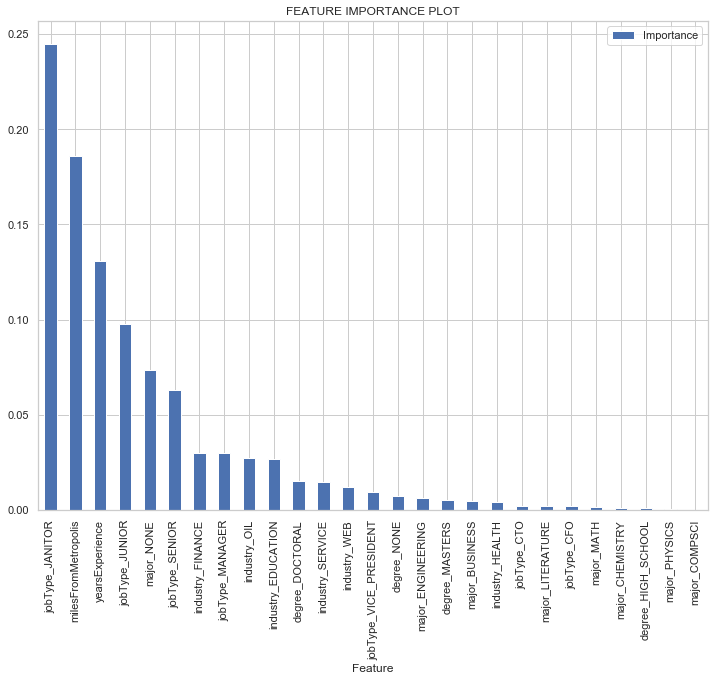

In [73]:
fig = feature_importance.plot.bar(figsize=(12,9))
fig.set_title('FEATURE IMPORTANCE PLOT')